## Logistic Regression

We have studied how to use linear regression and polynomial regression to *predict a target numeric value*. For example, we built a linear model to predict the Life Satisfaction Index given GDP per capita. There is another learning task, **classification**, aiming at predicting group membership rather than numeric values. Email spam filter is a good example: it is trained with many example emails with their class (spam or non-spam), and it must learn how to classify new emails.

Linear regression is **not** a good choice for classification tasks. We will introduce the **logistic regression** model and use the iris dataset to illustrate how the model works.

**Iris dataset** is a famous dataset that contains the sepal and petal length and width of 150 iris flowers of three different species: Iris-Setosa, Iris-Versicolor, and Iris-Virginica. [wiki page](https://en.wikipedia.org/wiki/Iris_flower_data_set)

In [2]:
# import iris dataset from sklearn
from sklearn import datasets
iris = datasets.load_iris()

# read official documentation of load_iris() to understand 
# the loaded dataset
iris_data = iris['data']
iris_data.shape
iris_data[:10,:]
iris_target = iris['target']
iris_target
iris_target_names = iris['target_names']
iris_target_names
iris_feature_names = iris['feature_names']
iris_feature_names
print(iris_feature_names)
iris_DESCR = iris['DESCR']
print(iris_DESCR)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== =

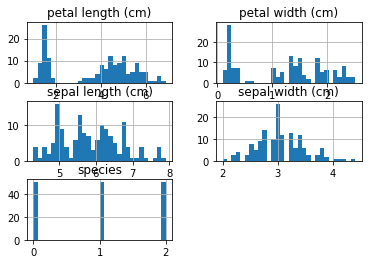

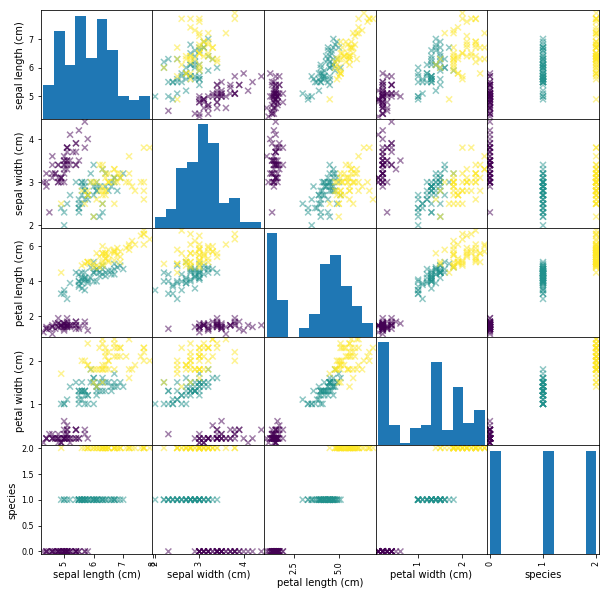

In [3]:
# Visualize the dataset: 
# Use pandas.DataFrame() to load iris data as a data frame, and
# 1. Compute descriptive statistics for each input feature
# 2. plot the distribution of each input feature
# 3. create scatter plot for each pair of features, use three 
#   colors to distinguish the three species.
import pandas as pd
iris_df = pd.DataFrame(data = iris_data, columns = iris_feature_names)
iris_df.head()
# add a new column called "Species"
# iris_df['species'] = iris_target       another way to update dataframes, however this creates a  
# iris_df.head()                         copy instead of changing the dataframe itself
iris_df = iris_df.assign(species = iris_target)
iris_df.head(100)
# to generate numerical statistics
iris_df.describe()


# draw historgram for each individual feature
import matplotlib.pyplot as plt
%matplotlib inline
iris_df.hist(bins = 30)
plt.show()

# create a scatter matrix
from pandas.plotting import scatter_matrix
scatter_matrix(iris_df, figsize = [10,10], marker = 'x', c = iris_df['species'])
plt.show()

In [4]:
# Split the dataset into training_set and test_set, where 
# test_set contains 20% randomly chosen data examples, and
# train_set contains the rest of data examples.
import numpy as np
size = len(iris_df.index)
arr = np.arange(size)
np.random.shuffle(arr)

# split arr into two sublists
test_ratio = 0.2
test_size = int(size * test_ratio)
test_indices = arr[:test_size]
train_indices = arr[test_size:]
print(test_indices)
print(train_indices)

# create two dataframes, test_set and train_set
test_set = iris_df.iloc[test_indices, :]
train_set = iris_df.iloc[train_indices, :]
train_set.head()
test_set.head()

[109 100 125  15  96  42  51  33  14 122  83  31  11 114 110 141  62 101
  75  82  45 105   2  92   6  90  81 128 143 106]
[  8 133  57  74   4  38  66   0  10 119 107 131 103  56  52  87  18  71
  34  47  79  72 112  12 136  20 127  49  55   9  64 126  29  98 134  97
  30 124  59  68  69 149 111  35  24  41  17 117 132  65  27 144 118 121
  48 137  25   1  95  39 120  46  50  54  61  36 147  89   5  16  28 116
   3 104  84  32  93  40 146 123  23  67 115  19 148  22  91  63  44  94
 113  37  86  73  88 140  60 145   7  85 138 130  99  77  78 108 139  43
  13  26  76  58  53  21  70 102 135 142  80 129]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
109,7.2,3.6,6.1,2.5,2
100,6.3,3.3,6.0,2.5,2
125,7.2,3.2,6.0,1.8,2
15,5.7,4.4,1.5,0.4,0
96,5.7,2.9,4.2,1.3,1


### Let's first apply linear regression

In [5]:
# perform multilinear regression on the training set. 
import sklearn.linear_model
lm = sklearn.linear_model.LinearRegression()

xs = train_set.iloc[:,:4]       #input - first four columns
ys = train_set.iloc[:,4]        #output - species column

lm.fit(xs,ys)

# use LinearRegression.score() to get the coefficient of 
# determination
lm.score(xs,ys)

0.92578824107744828

[  2.14278906e+00   2.24613767e+00   1.73411272e+00  -6.87095848e-02
   1.19578543e+00  -1.63390176e-02   1.28355872e+00  -1.74289406e-01
  -2.56010832e-01   1.97860732e+00   1.56612571e+00   1.11434443e-02
   2.38453955e-04   2.04455448e+00   1.70917290e+00   1.83269152e+00
   9.63327451e-01   1.76326549e+00   1.18324293e+00   1.05736328e+00
   2.26534627e-02   2.01490994e+00  -5.51992344e-02   1.08699245e+00
   3.21631490e-02   1.22797221e+00   9.43306260e-01   1.92325051e+00
   2.04578473e+00   1.62071008e+00]


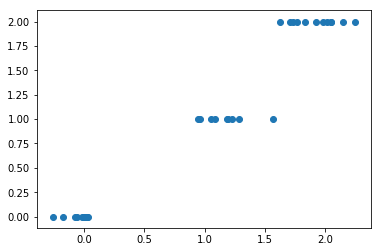

In [6]:
# apply the linear model to the test set
# show prediction vs. true class on a scatter plot
pred = lm.predict(test_set.iloc[:,:4])
print(pred)

plt.scatter(pred, test_set['species']) # test_set.iloc[4]
plt.show() # y coord represents the true value and x coord represents predicted value

# compute the accuracy of prediction
# decision rule: 
# < 0.5: label 0; 
# between 0.5 and 1.5: label 1;
# > 1.5: label 2.
for i,j in enumerate(pred):
    if j <0.5:
        pred[i] = 0
    elif j < 1.5:
        pred[i] = 1
    else:
        pred[i] = 2

**Problem of the above linear regression approach:**
1. hard to justify the classification rule
2. prediction has no clear meaning
3. label the classes with different values may cause the result to change

**Now let's look at logistic regression model:**

### Logistic Regression
**Single-class model**: fit the probability of data belonging to the class

$\log\frac{\hat{p}}{1 - \hat{p}} = h(x_1, ..., x_n),$

$h(x_1, ..., x_n) = \theta_1x_1 + \theta_2x_2 +\cdots + \theta_nx_n.$
- n: number of input features.
- x_1, ..., x_n: input features
- $\hat{p}$: the estimated probability of data belonging to the class
- $\theta_1,...,\theta_n$: parameters of the model

**Alternative format**:

$\hat{p} = \sigma(\textbf{x}\cdot\theta^T).$

- $\textbf{x} = (x_1, ..., x_n)$.
- $\theta = (\theta_1, ..., \theta_n)$.
- $\sigma(t) = \frac{1}{1+e^{-t}}$: logistic function

**Decision rule** (adjustible):

- prediction = 1 if $\hat{p}$ $\ge$ 0.5
- prediction = 0 if $\hat{p}$ < 0.5


In [7]:
# plot the graph of a logistic function over interval [-10, 10]

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_set[iris['feature_names']], train_set['species'])

# I tried to do:
# log_reg.fit(train_set[iris['feature_names']].values.reshape(-10, 10), train_set['species'].values.reshape(-10, 10))
# but an error was returned that the input shape was bad 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Training and Cost Function

**Cost function** for logistic regression:

\begin{equation}
c(\theta) = \left\{
\begin{array}{cc}
-\log(\hat{p}) & \textit{if }y=1,\\
-\log(1-\hat{p}) & \textit{if }y=0.
\end{array}
\right.
\end{equation}

The cost function $c(\theta)$:

- small if $y=1$ (data example belongs to the class) and $\hat{p}$ is close to 1.
- small if $y=0$ (data example does not belong to the class) and $\hat{p}$ is close to 0.
- is a convex function no matter what $y$ is.

**Uniformed expression for the cost function**:

$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}\big[y^{(i)}\log(\hat{p}^{(i)}) + (1-y^{(i)})\log(1-\hat{p}^{(i)})\big]$

- $c(\theta) = J(\theta)$ for $y=0$ and $y=1$.
- There is no equivalent of the Normal Equation.
- $J(\theta)$ is a convex function.
- $\frac{\partial J}{\partial \theta_j}=\frac{1}{m}\sum_{i=1}^{m}\big(\sigma(\textbf{x}^{(i)}\cdot\theta^T) - y^{(i)}\big)x_j^{(i)}$.

In [8]:
# Train logistic regressin model to identify Iris-Virginica
# make new column 'isVirginica'
train_set = train_set.assign(isVirginica=\
            (train_set['species'] == 2).astype(np.int))
test_set = test_set.assign(isVirginica=\
            (test_set['species'] == 2).astype(np.int))
# Show the first 10 rows of the training set.
train_set.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,isVirginica
8,4.4,2.9,1.4,0.2,0,0
133,6.3,2.8,5.1,1.5,2,1
57,4.9,2.4,3.3,1.0,1,0
74,6.4,2.9,4.3,1.3,1,0
4,5.0,3.6,1.4,0.2,0,0
38,4.4,3.0,1.3,0.2,0,0
66,5.6,3.0,4.5,1.5,1,0
0,5.1,3.5,1.4,0.2,0,0
10,5.4,3.7,1.5,0.2,0,0
119,6.0,2.2,5.0,1.5,2,1


In [9]:
# fit the training data to logistic model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(train_set[iris['feature_names']], train_set['isVirginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
# Append model predictions to the test_set
test_set = test_set.assign(prediction=log_reg.predict(\
                            test_set[iris['feature_names']]))

# Compute test accuracy
accuracy = sum(test_set['prediction']==test_set['isVirginica'])\
/len(test_set)
print('accuracy:', accuracy)

accuracy: 0.966666666667


### Visualing the decision boundary
To visulize what logistic regression can learn about the Iris dataset, let try two simpler models:

In [11]:
# build a logistic classifier based only on the petal width feature
log_reg2 = LogisticRegression(random_state=42)
log_reg2.fit(train_set['petal width (cm)'].values.reshape(-1, 1), train_set['isVirginica'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

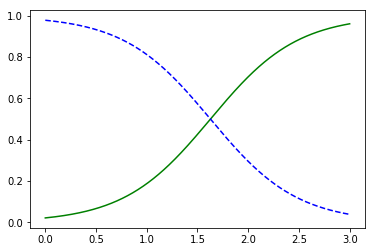

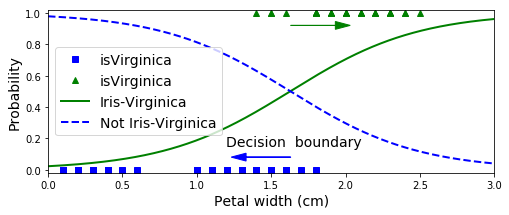

In [12]:
# Let's look at the model's estimated probabilities 
# for flowers with petal widths varying from 0 to 3cm
xs = np.linspace(0, 3, 1000).reshape(-1, 1)
ys = log_reg2.predict_proba(xs)
plt.plot(xs, ys[:, 1], 'g-', label='Iris-Virginica')
plt.plot(xs, ys[:, 0], 'b--', label='Not Iris-Virginica')

X = train_set['petal width (cm)'].values.reshape(-1, 1)
y = train_set['isVirginica']
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg2.predict_proba(X_new)
decision_boundary = xs[y_proba[:, 1] >= 0.5][0]
# plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

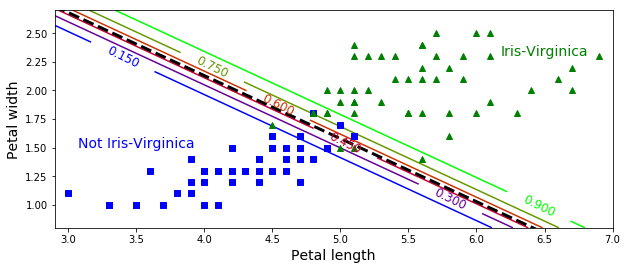

In [13]:
# logistic classifier based on both petal width and petal length
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Logistic Regression for Multiple Classes (Softmax regression)
**model**:

$\hat{p}_k = \frac{\exp(s_k(\textbf{x}))}{\sum_{i=1}^K\exp(s_i(\textbf{x}))}$.

$s_k(\textbf{x}) = \textbf{x}\cdot\theta_k^T$

- $\hat{p}_k$ is the probability that the instance belongs to class $k$.
- K is the number of classes.
- $\theta_k$ is the coefficient vector associated with class $k$. All these vectors are stored as rows in a parameter matrix $\Theta$.
- The softmax classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

**Cross entropy cost function**

$J(\Theta) = -\frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K
y_k^{(i)}\log(\hat{p}_k^{(i)})$

- $y_k^{(i)}$ is equal to 1 if the target for the i-th instance is $k$; otherwise, it is equal to 0.


In [14]:
# Use softmax regression to build a classifier for all three 
# classes 
softmax_reg = LogisticRegression(multi_class='multinomial',
                                 solver='lbfgs')
softmax_reg.fit(train_set[iris['feature_names']], train_set['species'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
# Append model predictions to the test_set
test_set = test_set.assign(prediction=softmax_reg.predict(\
                            test_set[iris['feature_names']]))

# Compute test accuracy
accuracy1 = sum(test_set['prediction']==test_set['isVirginica'])\
/len(test_set)
print('accuracy1:', accuracy1)

accuracy1: 0.333333333333


## Homework:

1. Complete this notebook.
2. Add a new cell below, and build a logistic classifier to identify Iris-Setosa based only on its petal width. Divide the dataset randomly into 80% training set and 20% test set, show accuracy on test set.
3. (graduate students) Visualize the model by showing the probability curve and decision boundary.

In [37]:
# HW Q2.:

train_set = train_set.assign(isSetosa=\
            (train_set['species'] == 0).astype(np.int))
test_set = test_set.assign(isSetosa=\
            (test_set['species'] == 0).astype(np.int))
train_set.head(10)

log_reg3 = LogisticRegression(random_state=42)
log_reg3.fit(train_set['petal width (cm)'].values.reshape(-1, 1), train_set['isSetosa'])




from sklearn.linear_model import LogisticRegression

X = iris["data"][:, 3]  # petal width
y = (iris["target"] == 0).astype(np.int)

log_reg4 = LogisticRegression(C=10**10, random_state=42)
log_reg4.fit(X.reshape(-1,1), y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg4.predict_proba(X_new.reshape(-1,1))

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg4.coef_[0][0] * left_right + log_reg4.intercept_[0]) / log_reg4.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Setosa", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Setosa", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

log_reg5 = LogisticRegression()
log_reg5.fit(train_set[iris['feature_names']],train_set['isSetosa'])

accuracy2 = sum(test_set['prediction'] == test_set['isSetosa'])/len(test_set)
print('accuracy2:', accuracy2)

IndexError: too many indices for array